# 공유이동수단 연관키워드 찾기

- 목표 : 공유이동수단을 검색했을때 나오는 연관 키워드 찾기
- 결과 : 공유이동수단이라고 했을때 생각나는 키워드 5개를 정하고 그 키워드와 관련된 연관검색어 분석
- 검색키워드 : 퍼스널모빌리티, 카카오자전거, 전동킥보드, 따릉이, 공유자전거
- 참고사이트 : 썸트렌드, 구글트렌드, 네이버데이터랩
- 키워드분석사이트 : [블랙키위](https://blackkiwi.net)

In [264]:
import os
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import font_manager as fm, rc


# 한글 인식 오류 대치
font_path='../font/malgun.ttf'
font_name=fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# pandas 가로, 세로 데이터 출력 조절
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

---
## 공유이동수단 키워드 탄생일

In [282]:
created = pd.read_csv('../data/personal_mobility/키워드최초등장일.csv',
                      parse_dates=['키워드 최초 등장일'])

# '키워드 최초 등장일' 컬럼에서 년도만 추출 후 사용기간 계산
y = 2022 - created['키워드 최초 등장일'].dt.year

,키워드,키워드 최초 등장일
0,카카오자전거,2017-09-12
1,공유이동수단,2020-07-09
2,공유자전거,2017-03-11
3,퍼스널모빌리티,2016-01-01
4,전동킥보드,2016-01-01
5,따릉이,2016-01-01


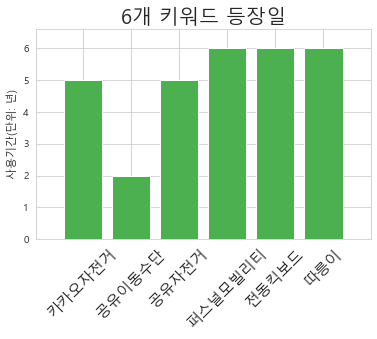

In [293]:
# x, y축, label에 들어갈 데이터 지정
x = np.arange(6)
y = y
labels = created['키워드']

# 막대형 그래프 설정
plt.bar(x, y, color='#4CAF50')
plt.title('6개 키워드 등장일', fontsize=20)
plt.ylabel('사용기간(단위: 년)', fontsize=11)
plt.xticks(x, labels, rotation=45, fontsize=15)
plt.margins(0.1)
plt.subplots_adjust(bottom=0.15)

# 그래프 출력
plt.show()

---
## Data setting

1. 5개의 키워드에 대한 7월 연관검색어 데이터 병합
2. 연관검색어에 검색어가 포함된 문자열 처리

In [ ]:
# 공유이동수단 키워드 관련 파일 통합
files = os.listdir('../data/keyword/')
files.reverse()
files.pop(1)  # 키워드최초등장일.csv

# DataFrame으로 형성된 데이터 모두 list에 담기
datas = []
for file in files:
    datas.append(pd.read_csv(f'../data/personal_mobility/{file}'))

In [ ]:
# 파일명에서 검색어 분리
search_word = [file.split('.')[0] for file in files]

# 컬럼 재설정
frames = pd.concat(datas,
                   keys=search_word,
                   names=['검색키워드', '인덱스'])
frames.rename(columns={'키워드':'연관검색어'}, inplace=True)
volume = frames['월간 검색량 (Total)'] + frames['블로그 누적 발행량']
frames.insert(1, column='검색량', value=volume)
frames.drop(frames.iloc[:, 2:], axis=1, inplace=True)

In [ ]:
# 연관검색어에 검색어가 포함된 단어 분리
reals = []
for s in search_word:
    split = frames.loc[s, '연관검색어'].str.split(s, expand=True).fillna('')
    reals.append(split[0] + split[1])

# 연관검색어 컬럼을 정제된 단어 데이터로 교체
frames2 = frames.copy()
frames2['연관검색어'] = pd.concat([reals[0], reals[1],
                              reals[2], reals[3],
                              reals[4]]).tolist()

---
## 공유이동수단과 관련해서 많이 찾아본 키워드 Top5

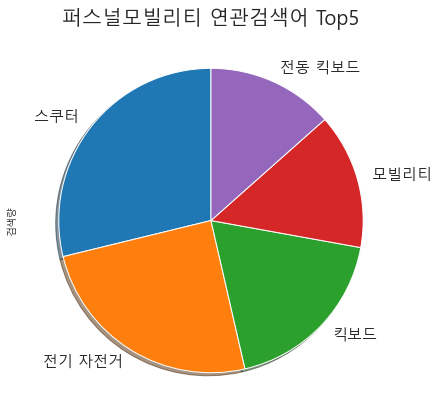

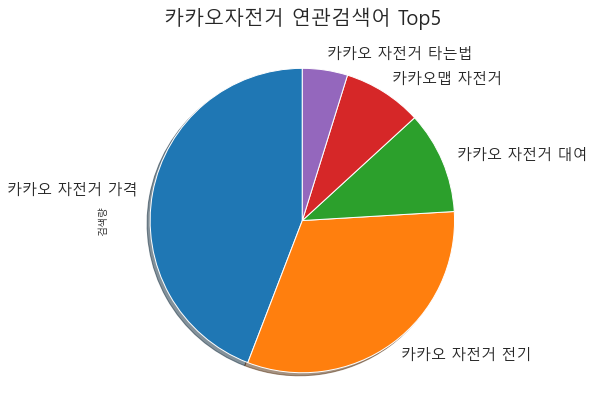

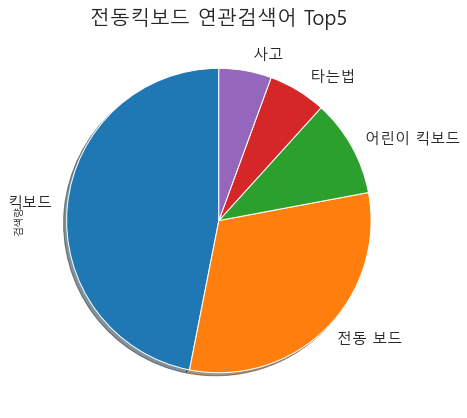

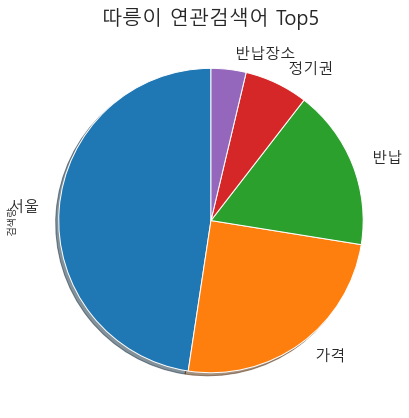

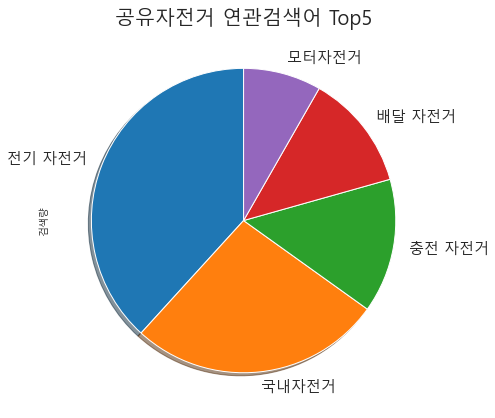

In [295]:
for s in search_word:
    volume = frames2.loc[s].sort_values('검색량', ascending=False)
    top5 = volume.iloc[:5]
    top5['검색량'].plot.pie(
        fontsize=15,
        figsize=(7, 7),
        labels=top5['연관검색어'],
        startangle=90,
        shadow=True,
    )
    plt.title(f'{s} 연관검색어 Top5', fontsize=20)
    plt.show()
    print()